<h1>Forest Type Prediction based on SVM and SGD</h1>

Chenxin Hu

22961779

<h1>Part1 data loading and visualization</h1>

In this part I’m going to explore the data set, glance through the basic information.

<code>head()/describe()/info()</code> are applied to view the text-information.

While a hist plot is drawn to visualize the data to get a better view.

What I learned from the exploration will later decide what pre-processing work will be done before the data is feed to the classifier

In [53]:
#import packages and train set, take a quick look
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
trainSet=pd.read_csv('./training.csv')
trainSet.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [54]:
#see the detail of the training set, to decide what basic cleaning should be done
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

In [55]:
#see some character values like mean/median/outliers
trainSet.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


In [56]:
#to see if the set is imbalanced
trainSet["class"].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

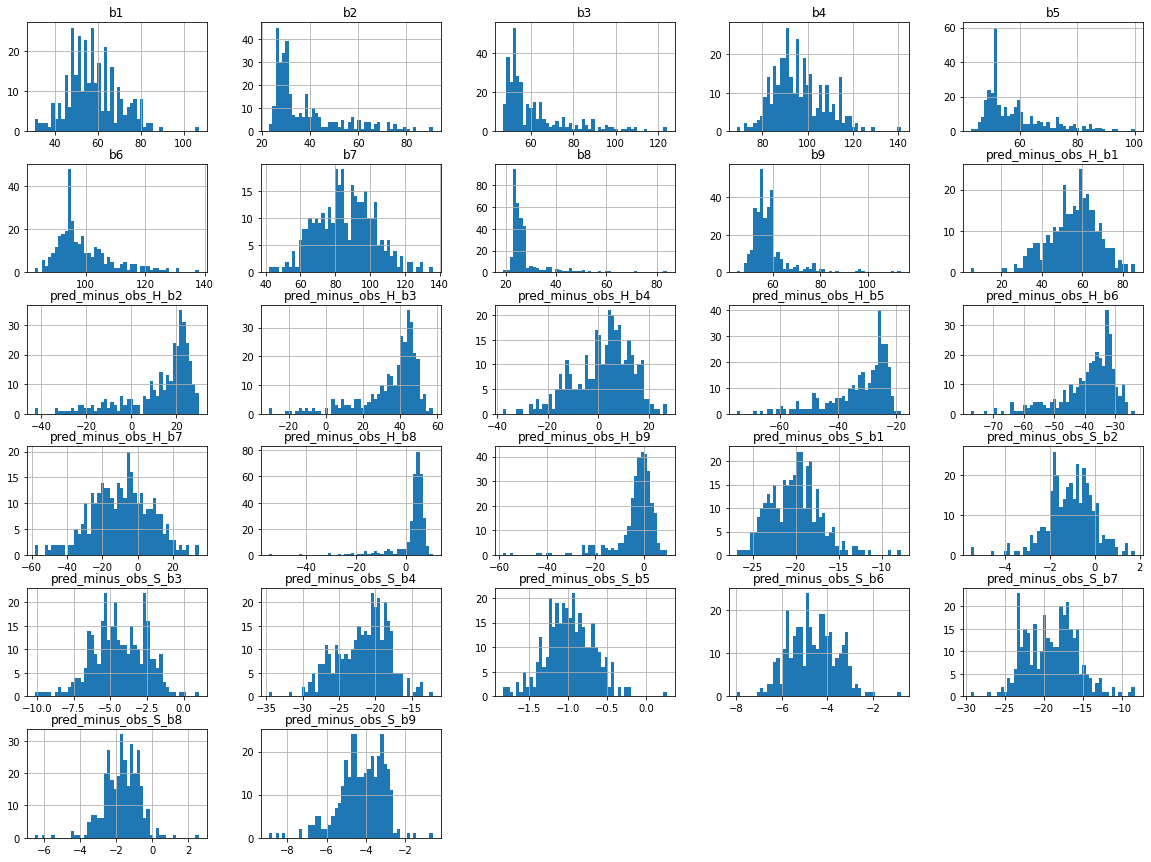

In [57]:
#let's look at the picture for a clear view
trainSet.hist(bins=50,figsize=(20,15))
plt.show()

In [58]:
#also read the test set, though no much pre-processing should be done on test sets to keep the data 'real', 
#but there's still something to do, like omit NAs
testSet=pd.read_csv('./testing.csv')
testSet.head()
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

<h4>From this part we can learn that:</h4>

1. Both training and testing data has no NAs, so there's no need to fill the NAs.

2. Some cols in training data has outliers, they need to be deleted.

3. If we delete the outliers, the cols' value range will be smaller than other cols' range, we need do rescaling to dealt with the problem. Notice: rescaling should be done before deleting outliers to maintain most characteristics of the data.

4. The label distribution of the data is imbalanced, the most label 's' has a amount of 136 while the least has a amount of 38, so oversampling should be applied to ensure we get a balanced set. 

<h1>Part2 data preparation and feature scaling</h1>

This part's tasks are:

1. Drop the redundant cols

2. Rescaling the set

3. Delete outliers

4. Oversampling to get a balanced set

5. Change the class label from char to double

In [59]:
#droping redundant cols 
def preprocessing(set):
    set.drop(set.columns[10:28],axis=1,inplace=True)
preprocessing(trainSet)
trainSet.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


In [60]:
#rescaling using MinMax rescaling
def rescaling(set):
    temp=set['class']
    set.drop('class',axis=1,inplace=True)
    set=(set-set.min())/(set.max()-set.min())
    set=pd.concat([temp,set],axis=1)
    return set
trainSet=rescaling(trainSet)
trainSet.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.355547,0.226199,0.187892,0.377436,0.264885,0.294490,0.466645,0.128852,0.201159
std,0.154014,0.214552,0.194849,0.154446,0.186928,0.171614,0.177051,0.114543,0.128765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.073529,0.064935,0.277778,0.140351,0.181818,0.329787,0.076923,0.130435
50%,0.342105,0.132353,0.103896,0.361111,0.192982,0.236364,0.457447,0.092308,0.173913
75%,0.447368,0.294118,0.233766,0.472222,0.350877,0.363636,0.595745,0.123077,0.217391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\10453\AppData\Local\Temp\ipykernel_14060\1610788680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols[(cols>=IQR*1.5+Q3)|(cols<=Q1-IQR*1.5)]=np.nan
C:\Users\10453\AppData\Local\Temp\ipykernel_14060\1610788680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols[(cols>=IQR*1.5+Q3)|(cols<=Q1-IQR*1.5)]=np.nan
C:\Users\10453\AppData\Local\Temp\ipykernel_14060\1610788680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


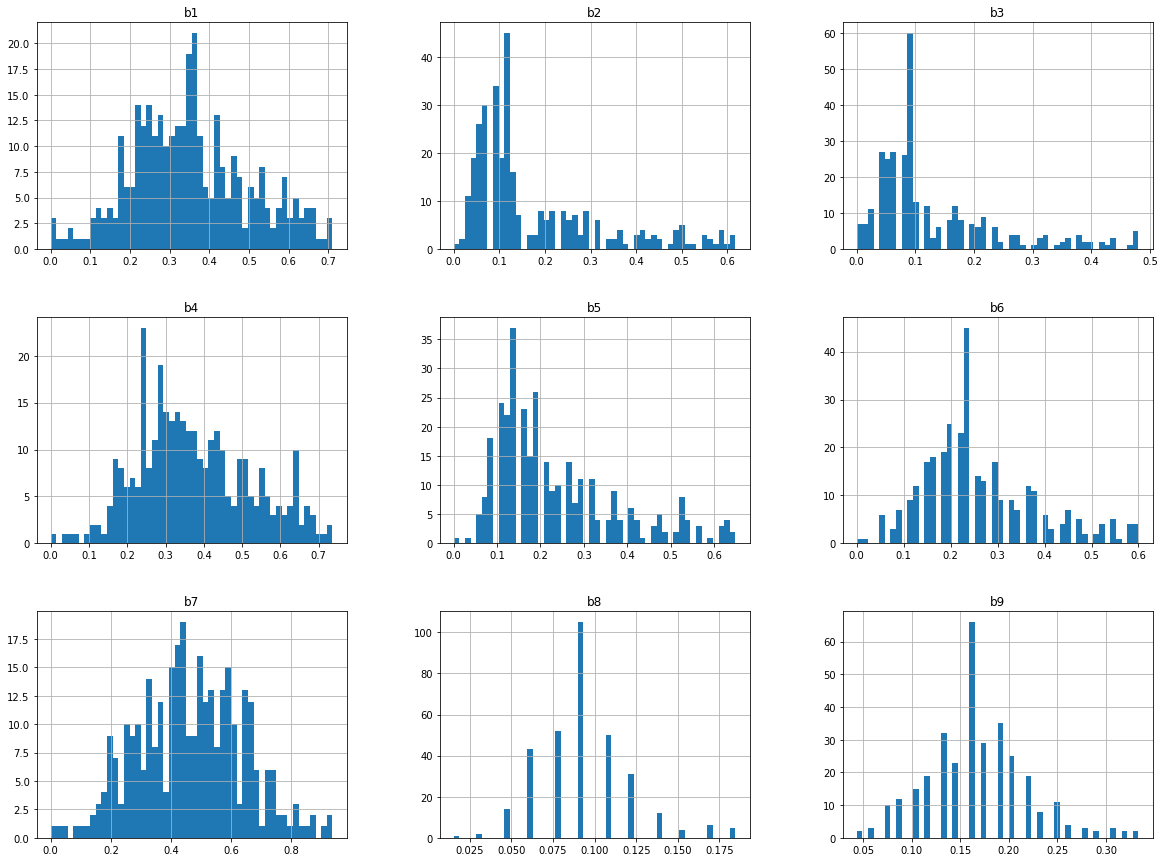

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   325 non-null    object 
 1   b1      325 non-null    float64
 2   b2      325 non-null    float64
 3   b3      325 non-null    float64
 4   b4      325 non-null    float64
 5   b5      325 non-null    float64
 6   b6      325 non-null    float64
 7   b7      325 non-null    float64
 8   b8      325 non-null    float64
 9   b9      325 non-null    float64
dtypes: float64(9), object(1)
memory usage: 25.5+ KB


In [61]:
#using quantiles to drop outliers
def deleteOutlier(set):
    for (colname,cols) in set.iteritems():
        if colname!="class":
            Q1=cols.quantile(0.25)
            Q3=cols.quantile(0.75)
            IQR=Q3-Q1
            cols[(cols>=IQR*1.5+Q3)|(cols<=Q1-IQR*1.5)]=np.nan
            cols.fillna(cols.median(),inplace=True)
deleteOutlier(trainSet)
trainSet.hist(bins=50,figsize=(20,15))
plt.show()
trainSet.info()

In [62]:
#over sampling, as we know before, the 'o' 'h' class has less labels, we can expand them to 2 times of the original number
counts=trainSet['class'].value_counts()
subSet1=trainSet[trainSet['class']=='o'].sample(frac=2,replace=True)
subSet2=trainSet[trainSet['class']=='h'].sample(frac=2,replace=True)
trainSet=pd.concat([trainSet,subSet1,subSet2])
trainSet['class'].value_counts()

o    138
s    136
h    114
d    105
Name: class, dtype: int64

In [63]:
#in the end, change the label from char to double, and remember drop cols, do rescaling and change the label for test set
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
def encoder(set):
    temp=set[['class']]
    temp2=ordinal_encoder.fit_transform(temp)
    set['class']=temp2
    set.head()
encoder(trainSet)
preprocessing(testSet)
testSet=rescaling(testSet)
encoder(testSet)  

<h1>Part 3 build and fine-tune models (SVM and SGD)</h1>

This part's tasks are:

1. build SVM and SGD classifier

2. using grid serach 3-fold and to fine-tune the model

In [66]:
#bulid svm classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
bestScore=0
#grid serach, automatically changing gamma and C
for kernel in ["rbf","sigmoid"]:#apply different kernels.
    for gamma in [0.001,0.01,0.1,1,10,100]:
        for C in [0.001,0.01,0.1,1,10,100]:
            svm =SVC(kernel=kernel,gamma=gamma,C=C)
            svm.fit(trainSet.drop('class',axis=1),trainSet['class'])
            #score=svm.score(testSet.drop('class',axis=1),testSet['class'])
            #3-fold cross validation
            scores=cross_val_score(svm,testSet.drop('class',axis=1),testSet['class'],scoring="accuracy",cv=3)
            score=scores.mean()
            if score>bestScore:
                bestScore=score
                bestParameters={'kernel':kernel,'gamma':gamma,'C':C}
print(bestScore)
print(bestParameters)
trainSet.head()


0.9494949494949495
{'kernel': 'rbf', 'gamma': 10, 'C': 10}


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,0.0,0.473684,0.411765,0.272727,0.638889,0.456140,0.509091,0.457447,0.184615,0.318841
1,3.0,0.473684,0.073529,0.051948,0.416667,0.122807,0.254545,0.425532,0.107692,0.202899
2,3.0,0.421053,0.044118,0.038961,0.361111,0.105263,0.145455,0.414894,0.107692,0.173913
3,0.0,0.421053,0.279412,0.207792,0.388889,0.403509,0.454545,0.734043,0.138462,0.202899
4,3.0,0.197368,0.058824,0.038961,0.194444,0.140351,0.127273,0.361702,0.107692,0.159420


In [67]:
#build sgd classifier
from sklearn.linear_model import SGDClassifier
bestScore=0
for loss in ["hinge","modified_huber","log"]:
    for penalty in ["l2","l1","elasticnet"]:
        for average in [True, False]:
            sgd=SGDClassifier(loss=loss,penalty=penalty,average=average)
            sgd.fit(trainSet.drop('class',axis=1),trainSet['class'])
            #3-fold cross validation
            scores=cross_val_score(sgd,testSet.drop('class',axis=1),testSet['class'],scoring="accuracy",cv=3)
            score=scores.mean()
            if score>bestScore:
                bestScore=score
                bestParameters={'loss':loss,'penalty':penalty,'average':average}
print(bestScore)
print(bestParameters)

0.9393939393939394
{'loss': 'modified_huber', 'penalty': 'l1', 'average': True}


<h1>Part5 Conclusion</h1>

<table>
<h3>training result</h3>
<tr><th>acc</th><th>classifier</th><th>drop cols</th><th>dealt outliers</th><th>rescaling</th><th>oversampling</th><th>encoding labels</th></tr>
<tr><td>0.954545454545454</td><td>svm</td><td>√</td><td></td><td></td><td></td><td></td></tr>
<tr><td>0.954545454545454</td><td>svm</td><td>√</td><td>√</td><td></td><td></td><td></td></tr>
<tr><td>0.954545454545454</td><td>svm</td><td>√</td><td></td><td>√</td><td></td><td></td></tr>
<tr><td>0.954545454545454</td><td>svm</td><td>√</td><td></td><td></td><td>√</td><td></td></tr>
<tr><td>0.954545454545454</td><td>svm</td><td>√</td><td>√</td><td>√</td><td>√</td><td></td></tr>
<tr><td>0.949494949494949</td><td>svm</td><td>√</td><td>√</td><td>√</td><td>√</td><td>√</td></tr>

<tr><td>0.868686868686868</td><td>sgd</td><td>√</td><td></td><td></td><td></td><td></td></tr>
<tr><td>0.873737373737373</td><td>sgd</td><td>√</td><td>√</td><td></td><td></td><td></td></tr>
<tr><td>0.883838383838383</td><td>sgd</td><td>√</td><td></td><td>√</td><td></td><td></td></tr>
<tr><td>0.888888888888888</td><td>sgd</td><td>√</td><td></td><td></td><td>√</td><td></td></tr>
<tr><td>0.878787878787878</td><td>sgd</td><td>√</td><td>√</td><td>√</td><td>√</td><td></td></tr>
<tr><td>0.939393939393939</td><td>sgd</td><td>√</td><td>√</td><td>√</td><td>√</td><td>√</td></tr>
</table>


From the train result, we can conclude that:

1. The svm classifier overall performs better than sgd classifier, that may because the train set is too small for sgd classifier to run

2. The pre-processing procedure has little influnence on svm classifier, its accuarcy maintians 0.95 and even decreased a little when encoder is applied

that may because the raw train set contains much enough character for svm, doing pre-processing may not benefit the training.

3. Though pre-processing benefits little on svm classifier, it benefits much on sgd classifier, when all the preprocessing is applied, its accuracy increases from 0.86 to 0.93